# Coding the Perceptron Algorithm

> Note: this doesn't work because the data is getting called from an outside function

Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv).

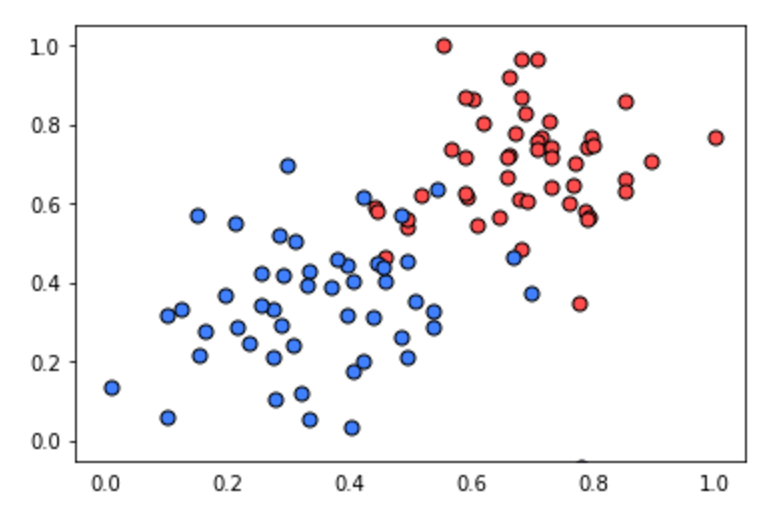
Recall that the perceptron step works as follows. For a point with coordinates (p,q)(p,q), label yy, and prediction given by the equation \hat{y} = step(w_1x_1 + w_2x_2 + b) 
y
^
​	 =step(w 
1
​	 x 
1
​	 +w 
2
​	 x 
2
​	 +b):

If the point is correctly classified, do nothing.
If the point is classified positive, but it has a negative label, subtract \alpha p, \alpha q,αp,αq, and \alphaα from w_1, w_2,w 
1
​	 ,w 
2
​	 , and bb respectively.
If the point is classified negative, but it has a positive label, add \alpha p, \alpha q,αp,αq, and \alphaα to w_1, w_2,w 
1
​	 ,w 
2
​	 , and bb respectively.

In [1]:
import numpy as np

In [2]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [3]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [4]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [ ]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [ ]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines